<a href="https://colab.research.google.com/github/mazdah/colab_practice/blob/main/%EC%A7%81%EC%9E%A5%EC%9D%B8%EC%9D%84_%EC%9C%84%ED%95%9C_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D10_%ED%9A%8C%EA%B7%80_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Scikit-learn : 회귀

- 수치형 값을 예측(Y의 값이 연속된 수치로 표현됨)
- 주택 가격 예측, 매출액 예측 등
---

### 보스턴 주택 가격 예측 데이터 세트

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

np.set_printoptions(suppress=True)
data = load_boston()
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
df['MEDV'] = data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


---
### 컬럼 설명

- CRIM : 범죄율
- ZN : 25,000 평방 피트 당 주거용 토지 비율
- INDUS : 비소매(non-retail) 비지니스 면적 비율
- CHAS : 찰스 강 더미 변수 (통로가 하천을 향하면 1, 그렇지 않으면 0)
- NOX : 산화 질소 농도 (천만 분의 1)
- RM : 주거 당 평균 방 수
- AGE : 1940년 이전에 건축된 자가 소유 점유 비율
- DIS : 5개의 보스턴 고융 센터까지의 가중 거리
- RAD : 고속도로 접근성 지수
- TAX : 10,000 달러 당 전체 가치 재산 세율
- PTRATIO : 도시 별 학생.교사 비율
- B : 1000(Bk-0.63)^2 여기서 Bk는 도시 별 검정 비율
- LSTAT : 인구의 낮은 지위
- MEDV : 자가 주택의 중앙값(1,000 달러 단위)

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'])

---
# Scikit-learn : 회귀 - 평가지표 (MSE, MAE, RMSE)

### MSE (Mean Squared Error)
- 예측 값과 실제 값의 차에 대한 제곱의 평균
- ${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

### MAE (Mean Absolute Error)
- 예측 값과 실제 값의 차에 대한 절대값의 평균
- $(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

### RMSE (Root Mean Squared Error)
- 예측 값과 실제 값의 차에대한 제곱을 편균한 뒤 루트를 씌운 값
- MSE가 값이 너무 커지는 경향이 있으므로 root를 씌워준다.
- $\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$
---

In [5]:
import numpy as np

# 샘플 데이터
pred = np.array([3, 4, 5])
actual = np.array([1, 2, 3])

# MSE 구하는 함수
def my_mse(pred, actual):
    return ((pred - actual) ** 2).mean()

In [6]:
my_mse(pred, actual)

4.0

In [7]:
# MAE 구하는 함수
def my_mae(pred, actual):
    return np.abs(pred - actual).mean()

In [8]:
my_mae(pred, actual)

2.0

In [9]:
# RMSE 구하는 함수
def my_rmse(pred, actual):
    return np.sqrt(my_mse(pred, actual))

In [10]:
my_rmse(pred, actual)

2.0

---
### sklearn의 평가지표 활용하기
---

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

my_mae(pred, actual), mean_absolute_error(pred, actual)

(2.0, 2.0)

In [12]:
my_mse(pred, actual), mean_squared_error(pred, actual)

(4.0, 4.0)

---
### 모델별 성능 확인을 위한 함수
---

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

---
# Scikit-learn : 회귀 - 선형회귀(Linear Regression)
---

In [14]:
from sklearn.linear_model import LinearRegression

# CPU의 모든 코어를 사용하기로 함
model = LinearRegression(n_jobs=-1)
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [15]:
pred = model.predict(x_test)

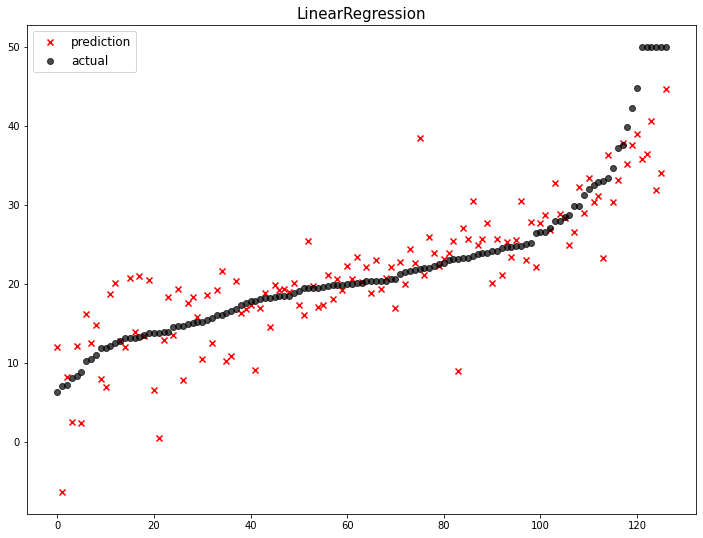

              model        mse
0  LinearRegression  27.125817


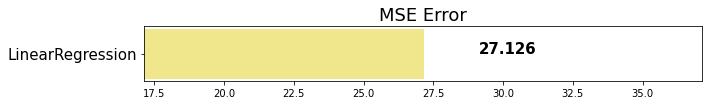

In [16]:
mse_eval('LinearRegression', pred, y_test)

---
# Scikit-learn : 회귀 - 규제(Regularization)

학습이 과대적합 되는 것을 방지하고자 일종의 penalty를 부여하는 것

### L2 규제 (L2 Regularization)
- 각 가중치 제곱의 합에 규제 강도(Regularization Strength) 𝝺를 곱한다.
- 𝝺를 크게 하면 가중치가 더 많이 감소되고(규제를 중요시함), 𝝺를 작게 하면 가중치가 증가한다(규제를 중요시하지 않음).
- Ridge 회귀에서 사용하는 규제

### L1 규제 (L1 Regularization)
- 가중치의 제곱의 합이 아닌 가중치의 합을 더한 값에 규제 강도(Regularization Strength) 𝝺를 곱하여 오차에 더한다.
- 어떤 가중치(w)는 실제로 0이 된다. 즉, 모델에서 완전히 제외되는 특성이 생기는 것이다.
- Lasso 회귀에서 사용하는규제

> L2 규제가 L1 규제에 비해 더 안정적이라 일반적으로 L2 규제가 더 많이 사용된다.

---
# Scikit-learn : 회귀 - Ridge 회귀 (L2 규제)
---

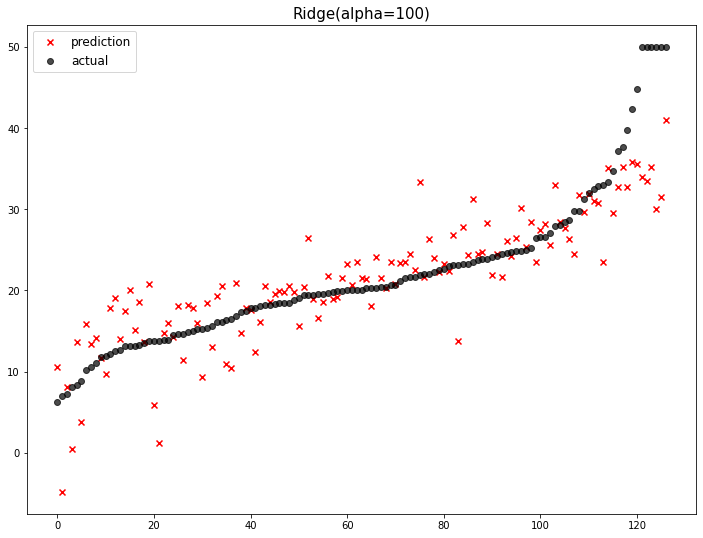

              model        mse
0  Ridge(alpha=100)  28.234192
1  LinearRegression  27.125817


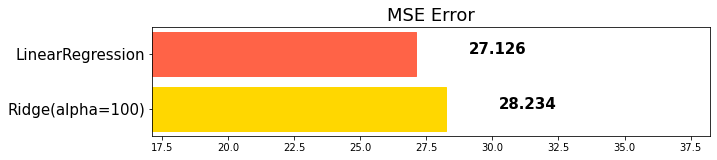

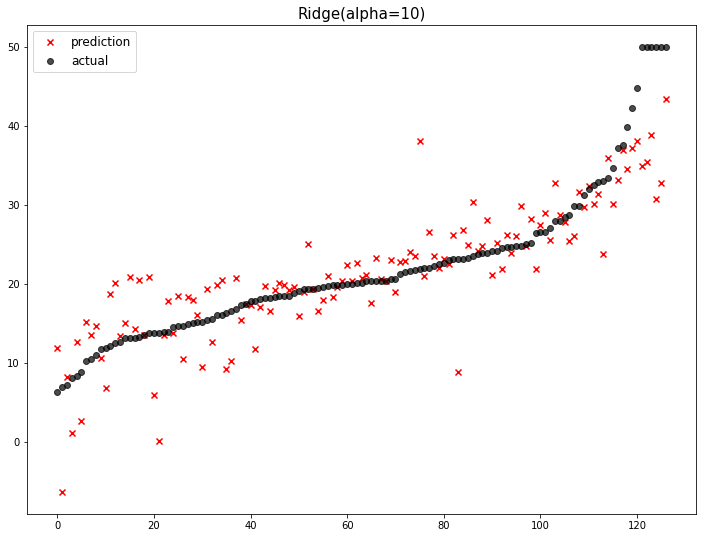

              model        mse
0  Ridge(alpha=100)  28.234192
1   Ridge(alpha=10)  28.100121
2  LinearRegression  27.125817


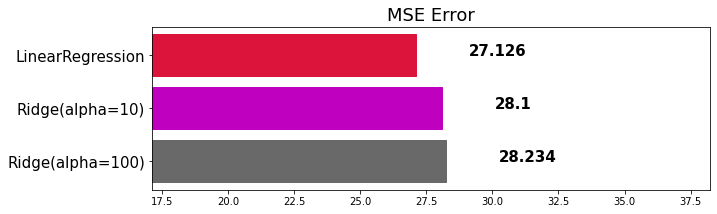

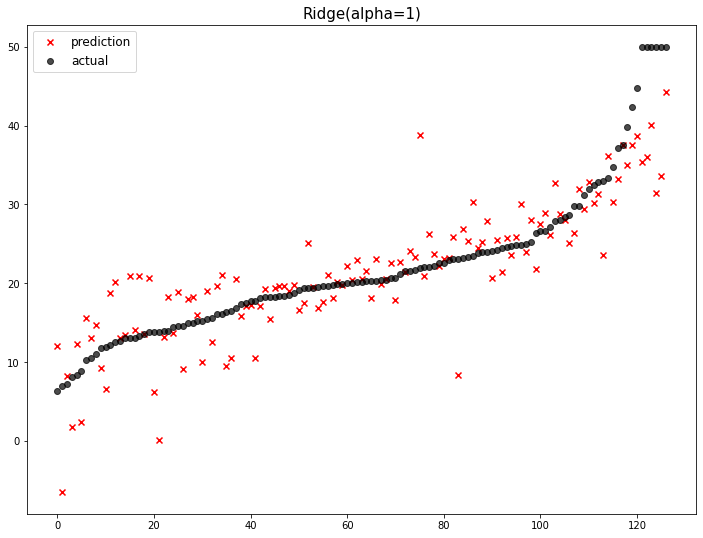

              model        mse
0  Ridge(alpha=100)  28.234192
1   Ridge(alpha=10)  28.100121
2    Ridge(alpha=1)  27.553631
3  LinearRegression  27.125817


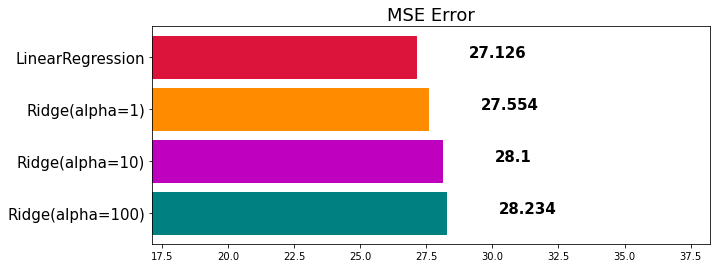

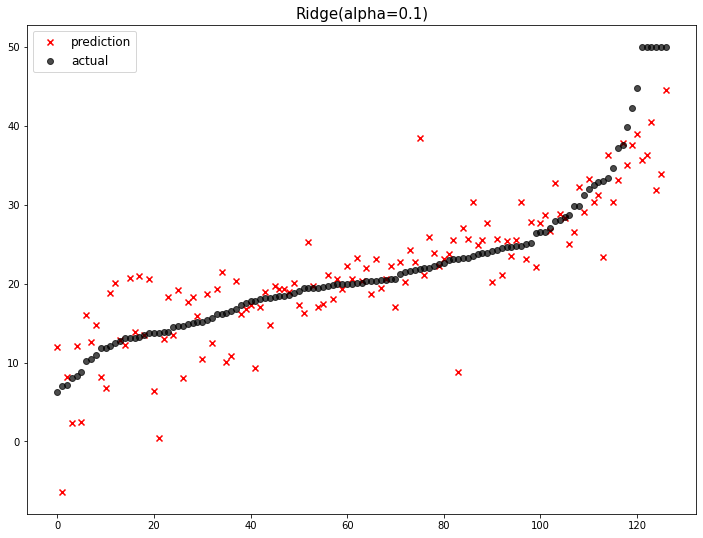

              model        mse
0  Ridge(alpha=100)  28.234192
1   Ridge(alpha=10)  28.100121
2    Ridge(alpha=1)  27.553631
3  Ridge(alpha=0.1)  27.170937
4  LinearRegression  27.125817


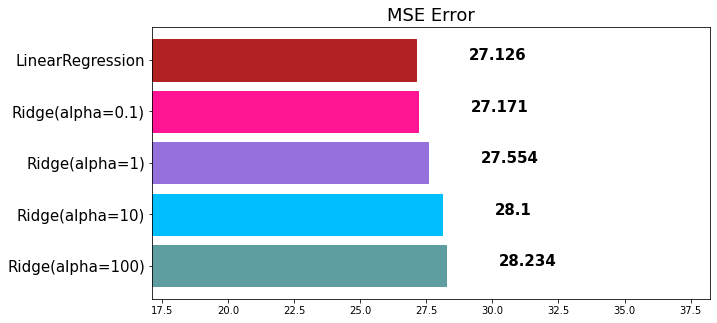

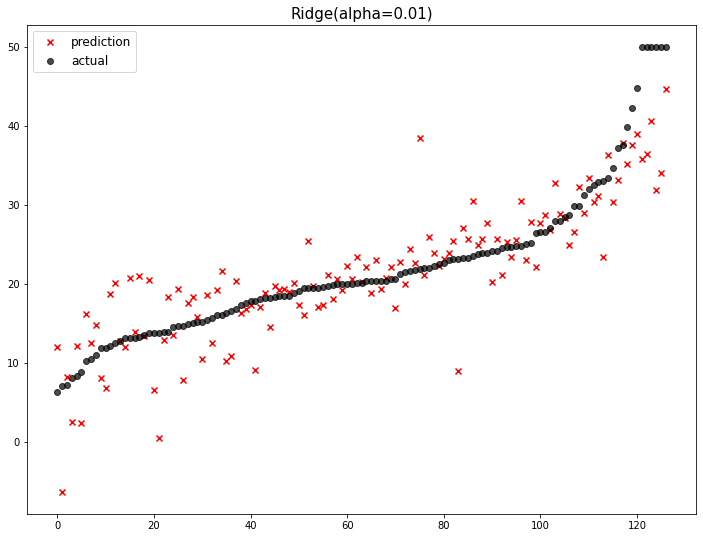

               model        mse
0   Ridge(alpha=100)  28.234192
1    Ridge(alpha=10)  28.100121
2     Ridge(alpha=1)  27.553631
3   Ridge(alpha=0.1)  27.170937
4  Ridge(alpha=0.01)  27.130057
5   LinearRegression  27.125817


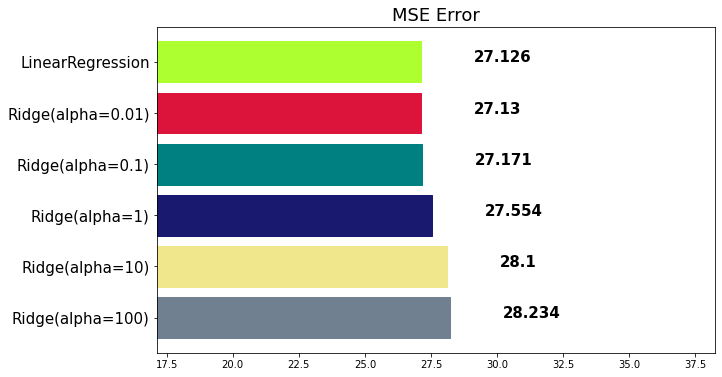

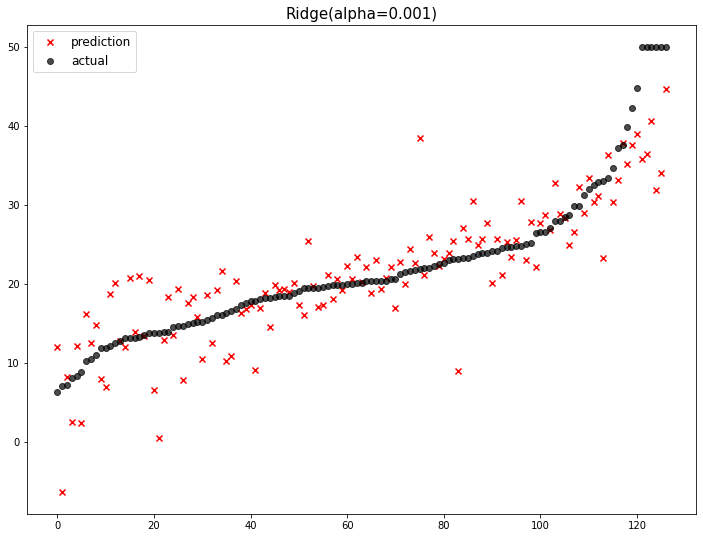

                model        mse
0    Ridge(alpha=100)  28.234192
1     Ridge(alpha=10)  28.100121
2      Ridge(alpha=1)  27.553631
3    Ridge(alpha=0.1)  27.170937
4   Ridge(alpha=0.01)  27.130057
5  Ridge(alpha=0.001)  27.126238
6    LinearRegression  27.125817


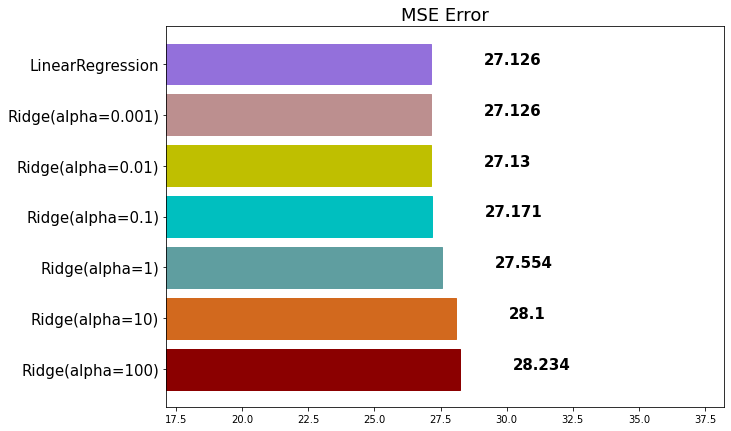

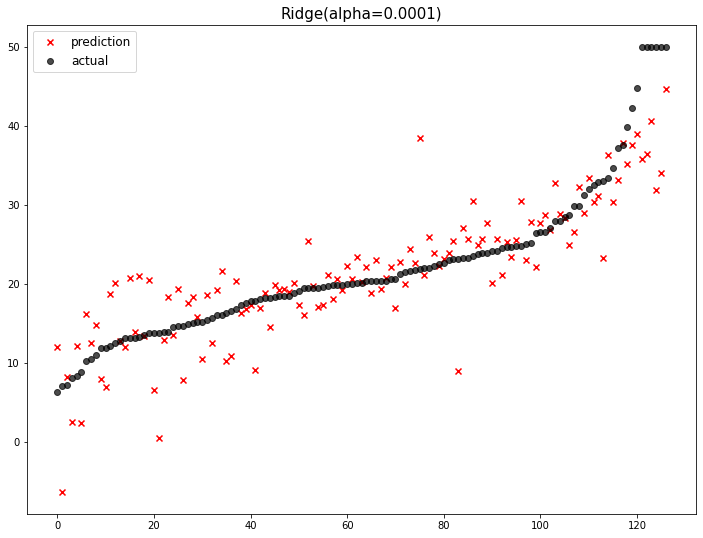

                 model        mse
0     Ridge(alpha=100)  28.234192
1      Ridge(alpha=10)  28.100121
2       Ridge(alpha=1)  27.553631
3     Ridge(alpha=0.1)  27.170937
4    Ridge(alpha=0.01)  27.130057
5   Ridge(alpha=0.001)  27.126238
6  Ridge(alpha=0.0001)  27.125859
7     LinearRegression  27.125817


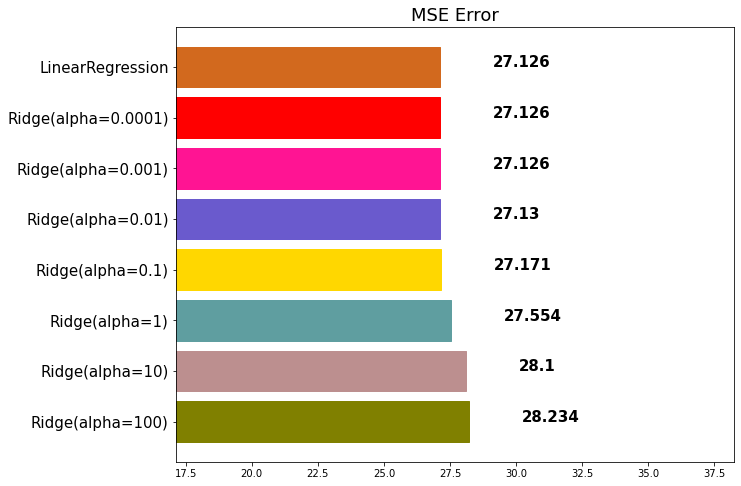

In [17]:
from sklearn.linear_model import Ridge

# 규제항의 값들. 값이 커질수록 규제가 강해진다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

#for alpha in alphas:
#    remove_model('Ridge(alpha=[])'.format(alpha))

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    mse_eval('Ridge(alpha={})'.format(alpha), pred, y_test)

In [18]:
ridge.coef_

array([ -0.16186535,   0.0513006 ,   0.00517848,   1.96303859,
       -16.42717962,   4.3603538 ,  -0.01730784,  -1.56554386,
         0.38166851,  -0.01443445,  -0.82705157,   0.01078279,
        -0.47194559])

In [19]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

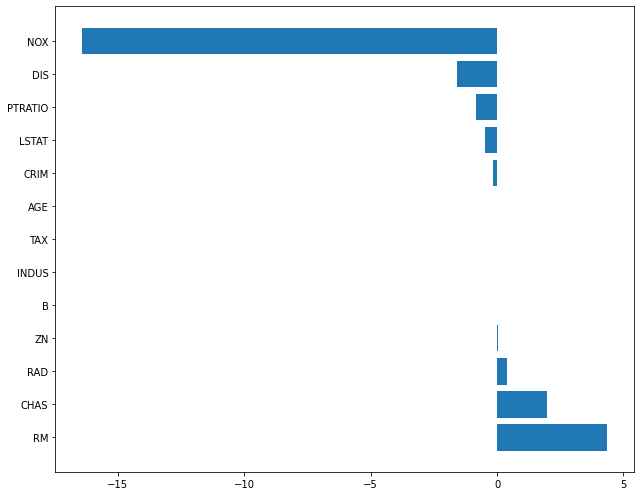

In [20]:
plot_coef(x_train.columns, ridge.coef_)

In [21]:
ridge_100 = Ridge(alpha=100)# 코드입력
ridge_100.fit(x_train, y_train)
ridge_pred_100 = ridge_100.predict(x_test)

ridge_001 = Ridge(alpha=0.001)# 코드입력
ridge_001.fit(x_train, y_train)
ridge_pred_001 = ridge_001.predict(x_test)

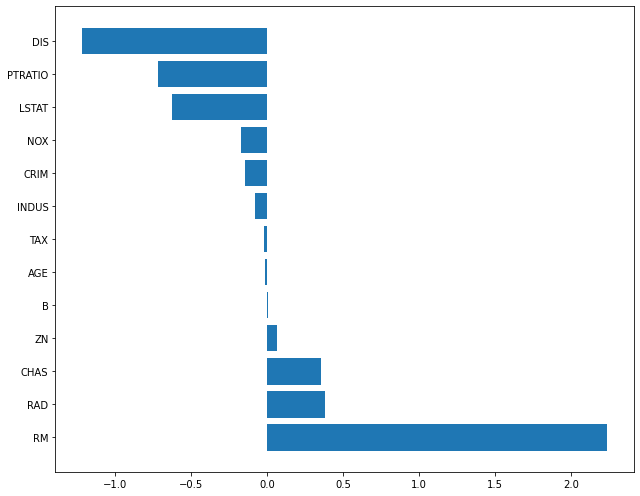

In [22]:
plot_coef(x_train.columns, ridge_100.coef_)

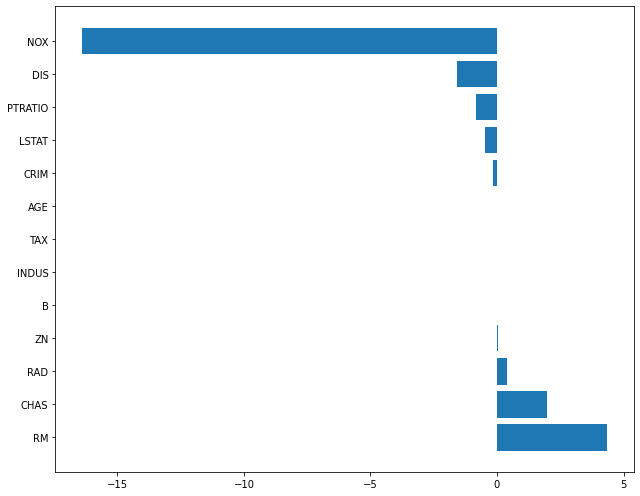

In [23]:
plot_coef(x_train.columns, ridge_001.coef_)

---
# Scikit-learn : 회귀 - Lasso 회귀 (L1 규제)
---

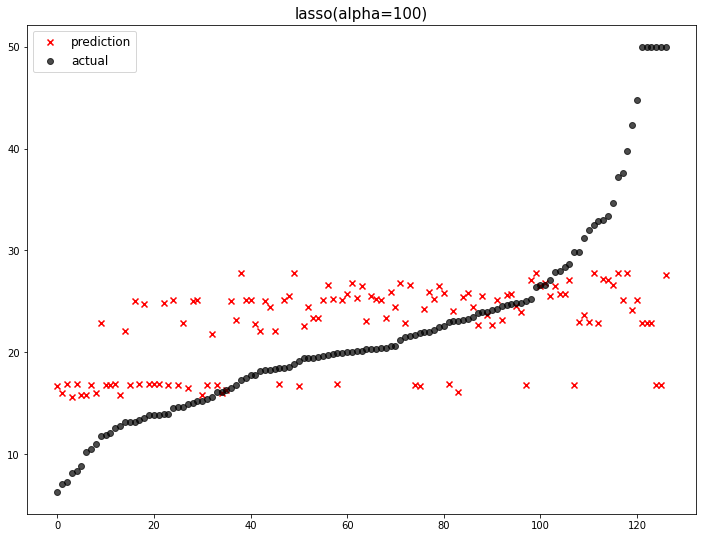

                 model        mse
0     lasso(alpha=100)  77.687770
1     Ridge(alpha=100)  28.234192
2      Ridge(alpha=10)  28.100121
3       Ridge(alpha=1)  27.553631
4     Ridge(alpha=0.1)  27.170937
5    Ridge(alpha=0.01)  27.130057
6   Ridge(alpha=0.001)  27.126238
7  Ridge(alpha=0.0001)  27.125859
8     LinearRegression  27.125817


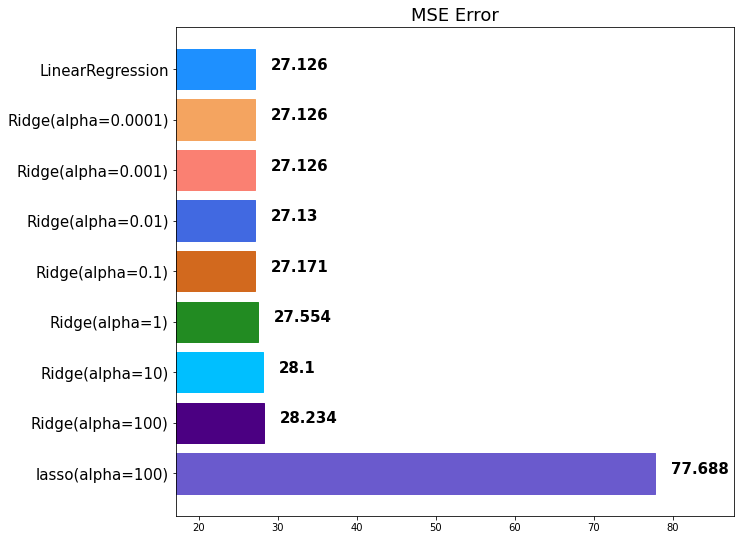

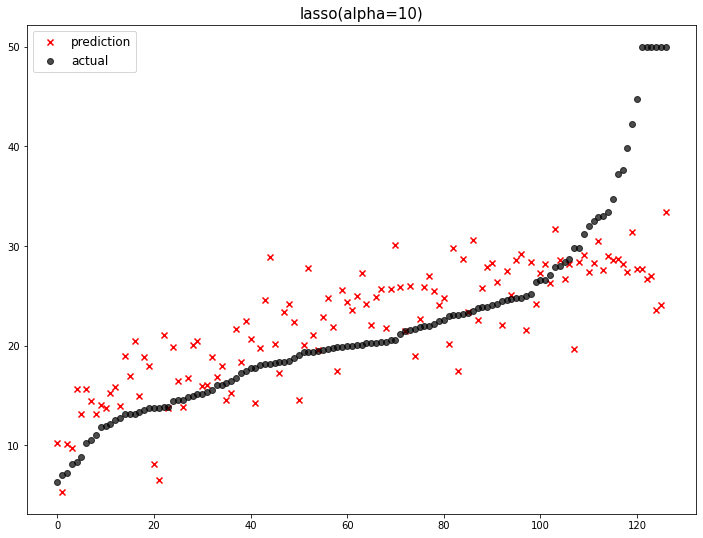

                 model        mse
0     lasso(alpha=100)  77.687770
1      lasso(alpha=10)  46.775705
2     Ridge(alpha=100)  28.234192
3      Ridge(alpha=10)  28.100121
4       Ridge(alpha=1)  27.553631
5     Ridge(alpha=0.1)  27.170937
6    Ridge(alpha=0.01)  27.130057
7   Ridge(alpha=0.001)  27.126238
8  Ridge(alpha=0.0001)  27.125859
9     LinearRegression  27.125817


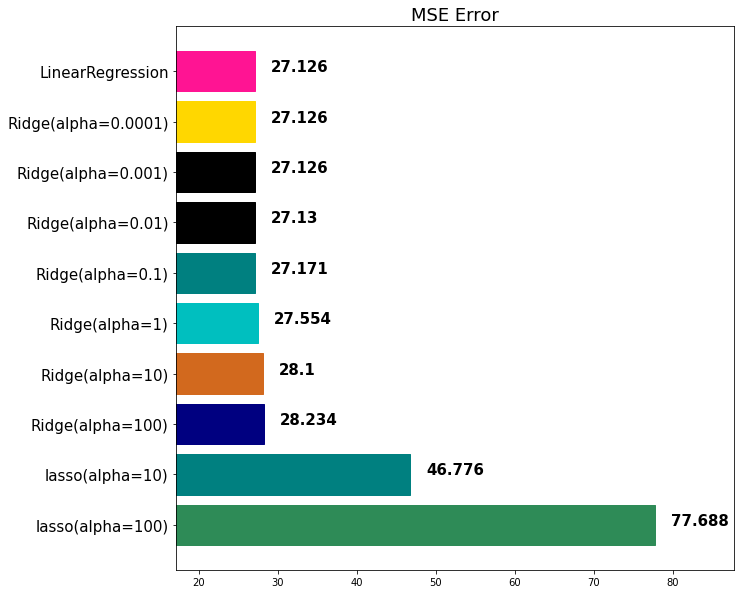

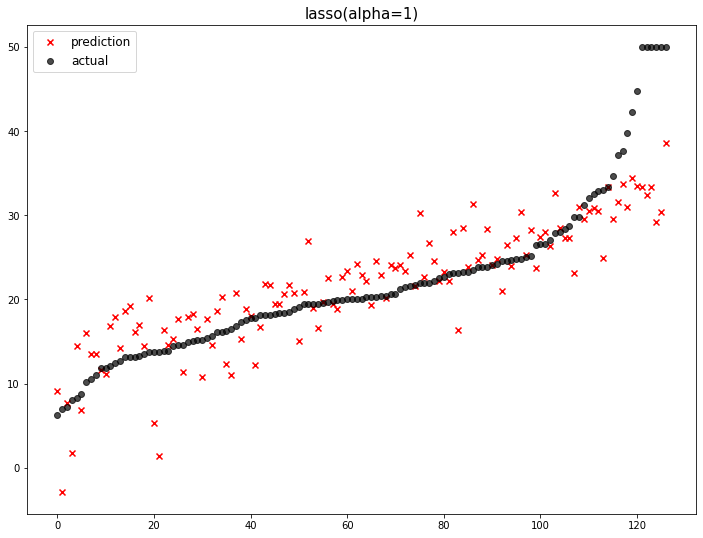

                  model        mse
0      lasso(alpha=100)  77.687770
1       lasso(alpha=10)  46.775705
2        lasso(alpha=1)  29.633294
3      Ridge(alpha=100)  28.234192
4       Ridge(alpha=10)  28.100121
5        Ridge(alpha=1)  27.553631
6      Ridge(alpha=0.1)  27.170937
7     Ridge(alpha=0.01)  27.130057
8    Ridge(alpha=0.001)  27.126238
9   Ridge(alpha=0.0001)  27.125859
10     LinearRegression  27.125817


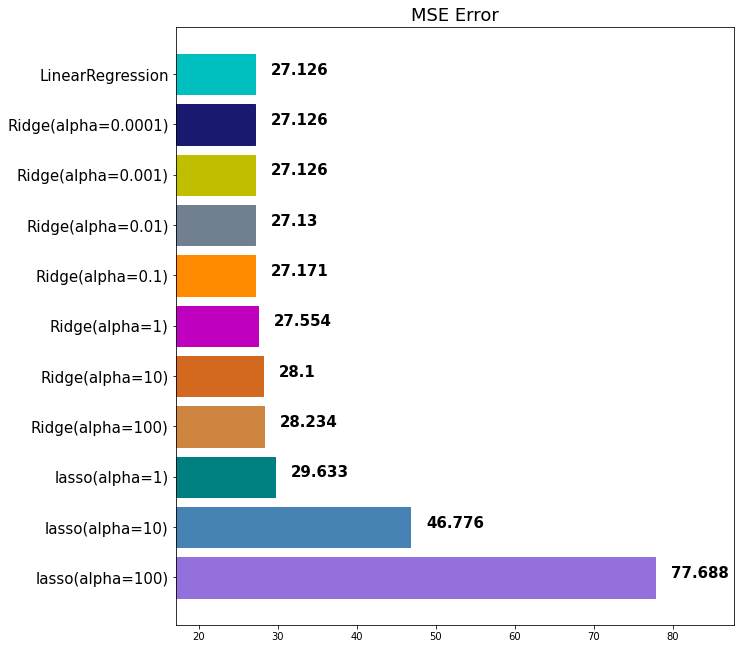

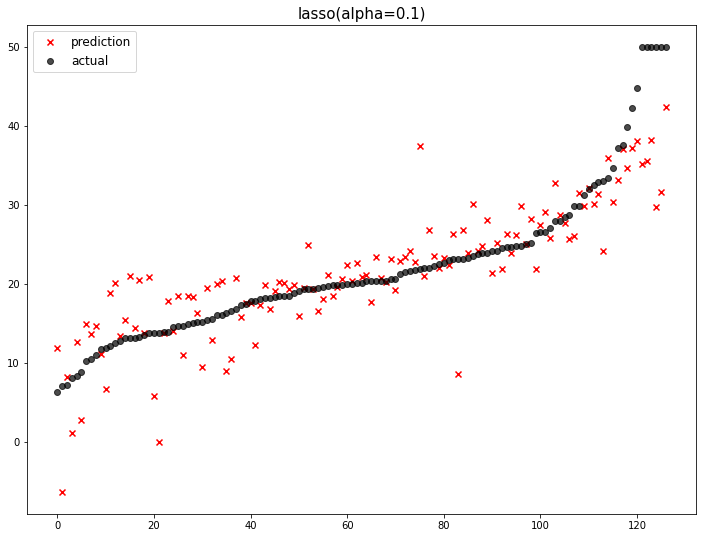

                  model        mse
0      lasso(alpha=100)  77.687770
1       lasso(alpha=10)  46.775705
2        lasso(alpha=1)  29.633294
3      lasso(alpha=0.1)  28.716565
4      Ridge(alpha=100)  28.234192
5       Ridge(alpha=10)  28.100121
6        Ridge(alpha=1)  27.553631
7      Ridge(alpha=0.1)  27.170937
8     Ridge(alpha=0.01)  27.130057
9    Ridge(alpha=0.001)  27.126238
10  Ridge(alpha=0.0001)  27.125859
11     LinearRegression  27.125817


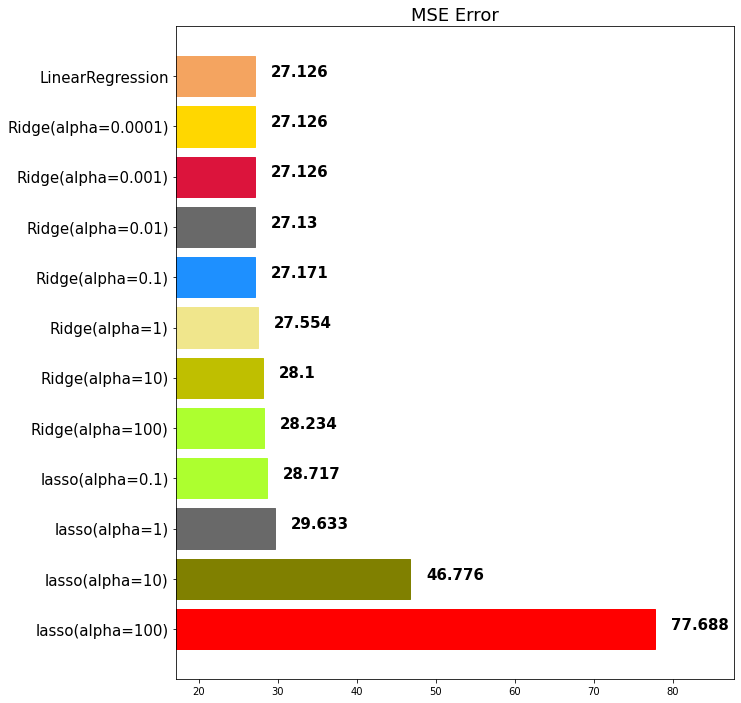

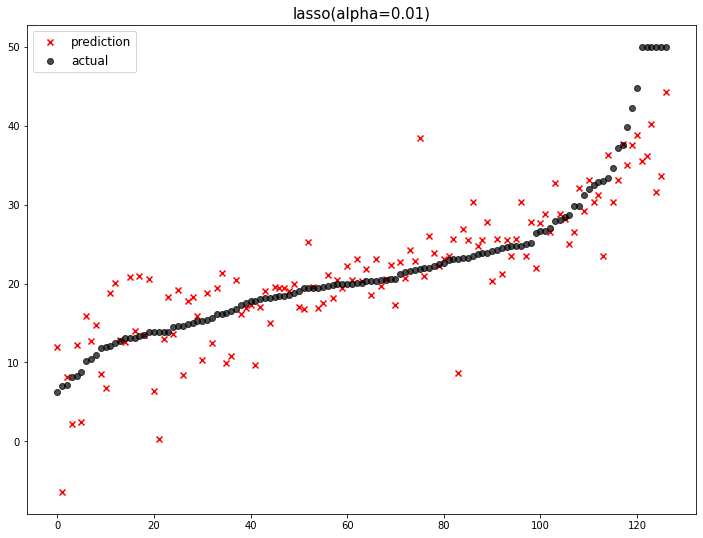

                  model        mse
0      lasso(alpha=100)  77.687770
1       lasso(alpha=10)  46.775705
2        lasso(alpha=1)  29.633294
3      lasso(alpha=0.1)  28.716565
4      Ridge(alpha=100)  28.234192
5       Ridge(alpha=10)  28.100121
6        Ridge(alpha=1)  27.553631
7     lasso(alpha=0.01)  27.267379
8      Ridge(alpha=0.1)  27.170937
9     Ridge(alpha=0.01)  27.130057
10   Ridge(alpha=0.001)  27.126238
11  Ridge(alpha=0.0001)  27.125859
12     LinearRegression  27.125817


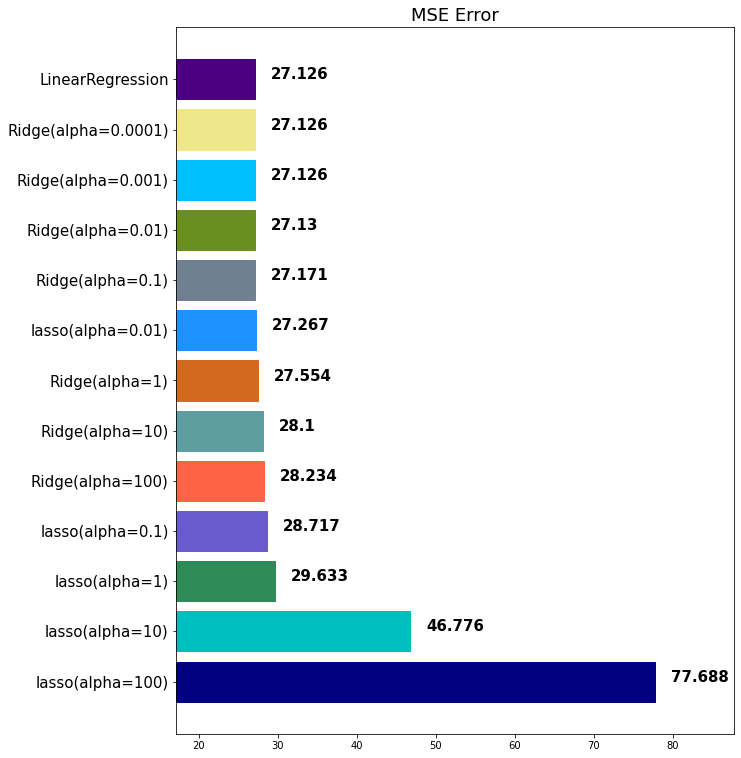

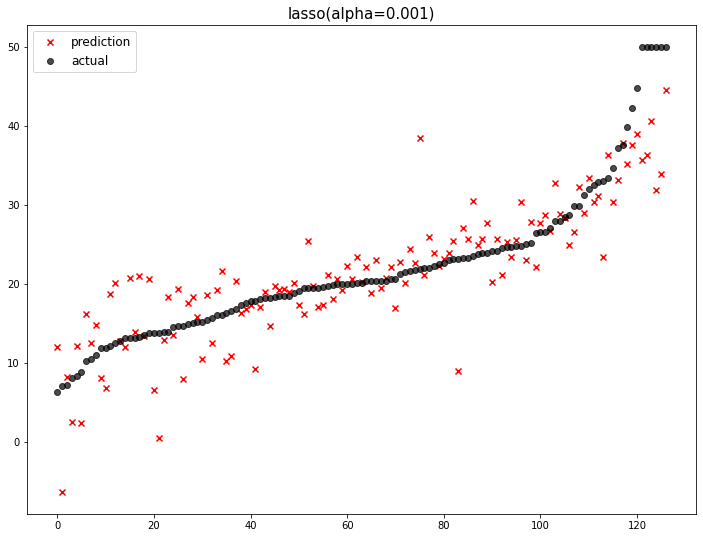

                  model        mse
0      lasso(alpha=100)  77.687770
1       lasso(alpha=10)  46.775705
2        lasso(alpha=1)  29.633294
3      lasso(alpha=0.1)  28.716565
4      Ridge(alpha=100)  28.234192
5       Ridge(alpha=10)  28.100121
6        Ridge(alpha=1)  27.553631
7     lasso(alpha=0.01)  27.267379
8      Ridge(alpha=0.1)  27.170937
9    lasso(alpha=0.001)  27.135847
10    Ridge(alpha=0.01)  27.130057
11   Ridge(alpha=0.001)  27.126238
12  Ridge(alpha=0.0001)  27.125859
13     LinearRegression  27.125817


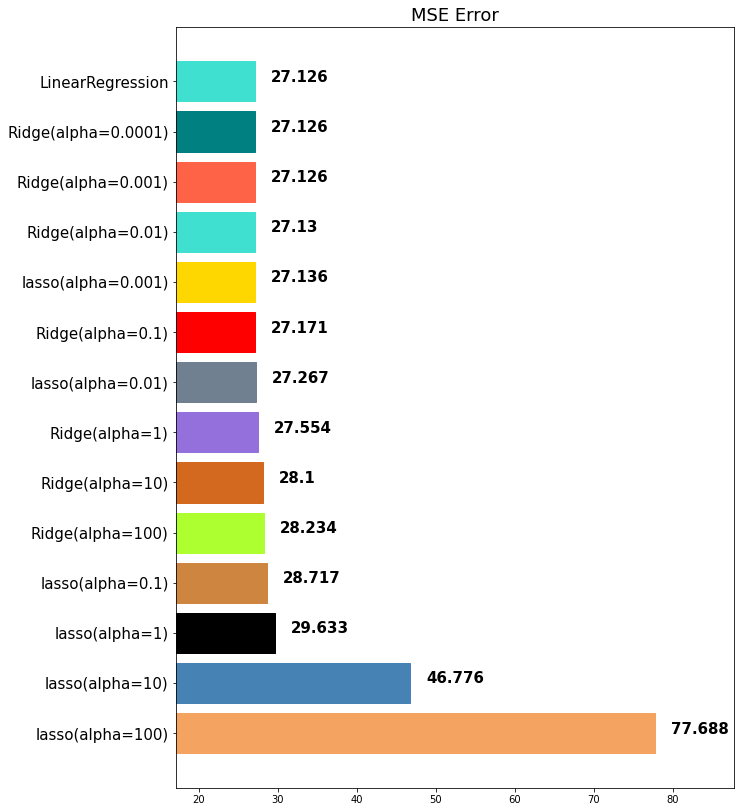

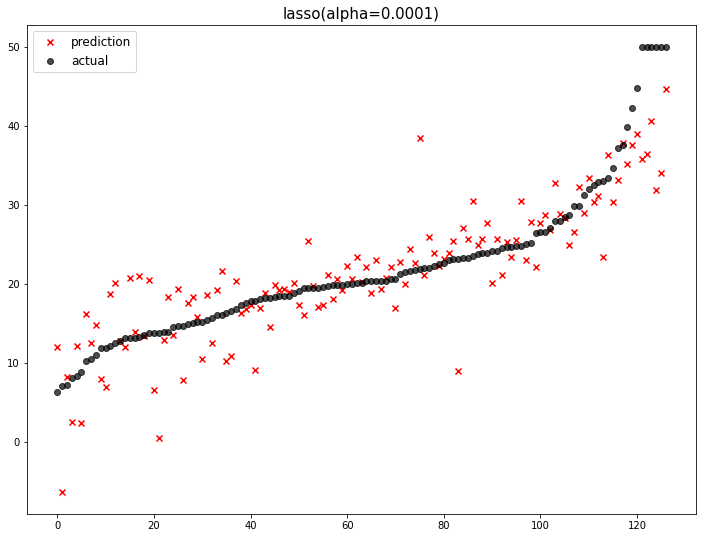

                  model        mse
0      lasso(alpha=100)  77.687770
1       lasso(alpha=10)  46.775705
2        lasso(alpha=1)  29.633294
3      lasso(alpha=0.1)  28.716565
4      Ridge(alpha=100)  28.234192
5       Ridge(alpha=10)  28.100121
6        Ridge(alpha=1)  27.553631
7     lasso(alpha=0.01)  27.267379
8      Ridge(alpha=0.1)  27.170937
9    lasso(alpha=0.001)  27.135847
10    Ridge(alpha=0.01)  27.130057
11  lasso(alpha=0.0001)  27.126776
12   Ridge(alpha=0.001)  27.126238
13  Ridge(alpha=0.0001)  27.125859
14     LinearRegression  27.125817


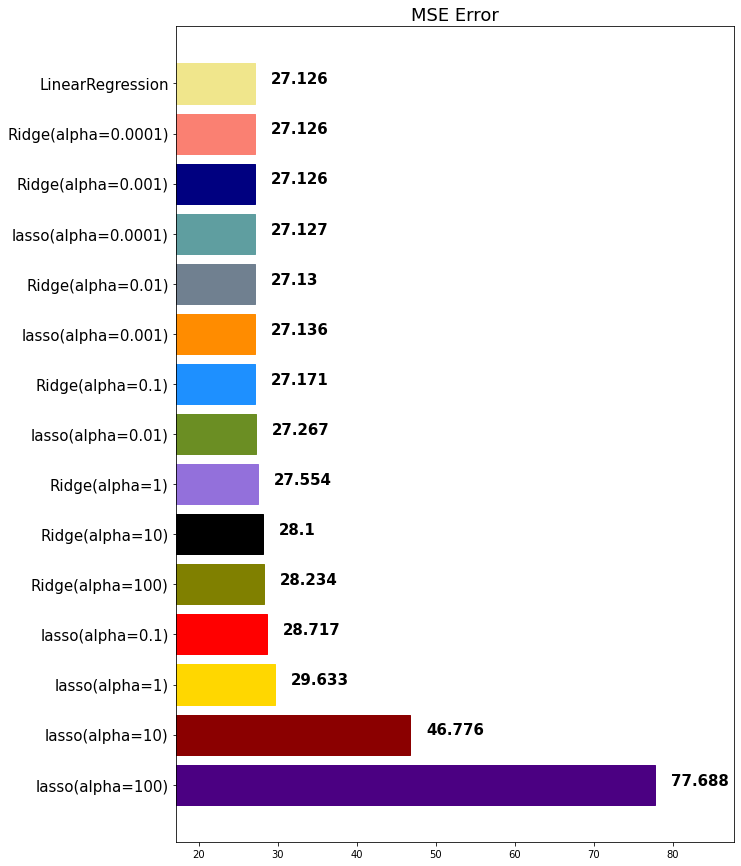

In [24]:
from sklearn.linear_model import Lasso

# 규제항의 값들. 값이 커질수록 규제가 강해진다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

#for alpha in alphas:
#    remove_model('Ridge(alpha=[])'.format(alpha))

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    mse_eval('lasso(alpha={})'.format(alpha), pred, y_test)

In [25]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(x_train, y_train)
lasso_pred_001 = lasso_001.predict(x_test)

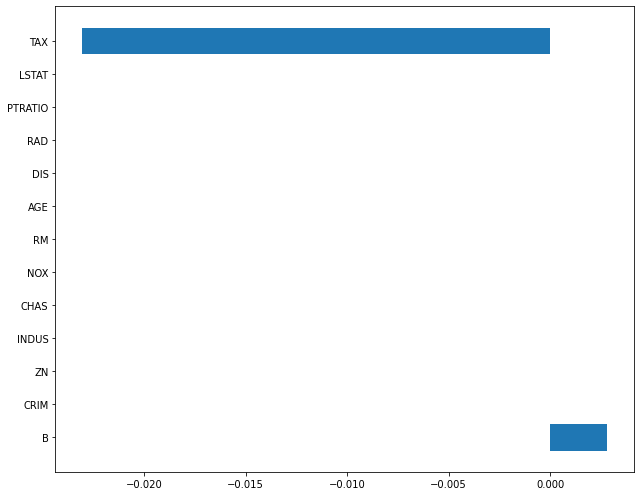

In [26]:
plot_coef(x_train.columns, lasso_100.coef_)

In [27]:
lasso_100.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.02307226,
       -0.        ,  0.00282081, -0.        ])

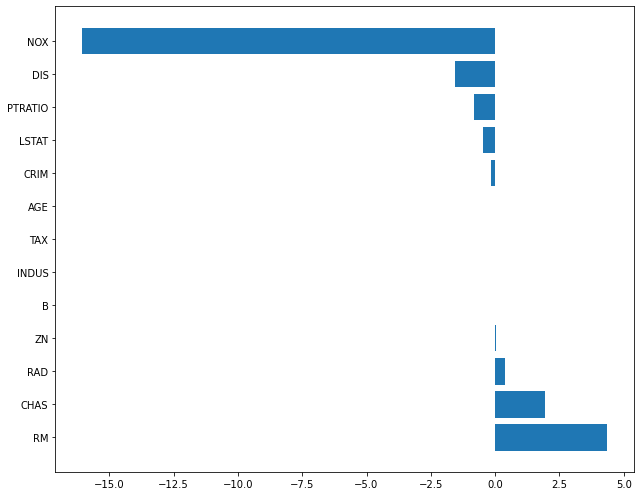

In [28]:
plot_coef(x_train.columns, lasso_001.coef_)

In [29]:
lasso_001.coef_

array([ -0.16170083,   0.05137874,   0.0036793 ,   1.9448779 ,
       -16.06946844,   4.36014014,  -0.01755451,  -1.55977448,
         0.38073136,  -0.01446659,  -0.8230169 ,   0.01079767,
        -0.47241754])

---
# Scikit-learn : 회귀 - Elasticnet
---

**l1_ratio (default=0.5)**

- l1_ratio = 0 (L2 규제만 사용)
- l1_ratio = 1 (L1 규제만 사용)
- 0 < l1_ratio < 1 (L1 규제와 L2 규제를 혼합하여 사용)

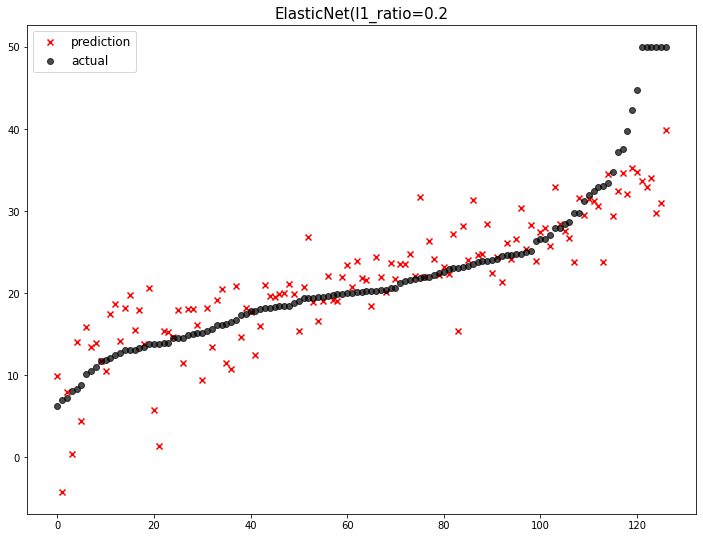

                      model        mse
0          lasso(alpha=100)  77.687770
1           lasso(alpha=10)  46.775705
2            lasso(alpha=1)  29.633294
3   ElasticNet(l1_ratio=0.2  28.804810
4          lasso(alpha=0.1)  28.716565
5          Ridge(alpha=100)  28.234192
6           Ridge(alpha=10)  28.100121
7            Ridge(alpha=1)  27.553631
8         lasso(alpha=0.01)  27.267379
9          Ridge(alpha=0.1)  27.170937
10       lasso(alpha=0.001)  27.135847
11        Ridge(alpha=0.01)  27.130057
12      lasso(alpha=0.0001)  27.126776
13       Ridge(alpha=0.001)  27.126238
14      Ridge(alpha=0.0001)  27.125859
15         LinearRegression  27.125817


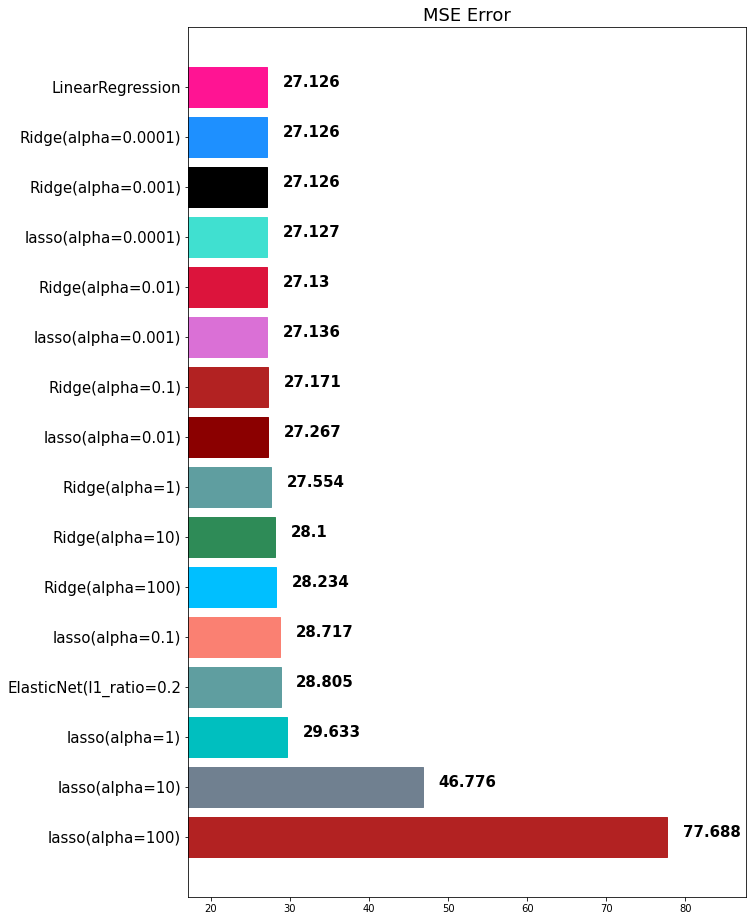

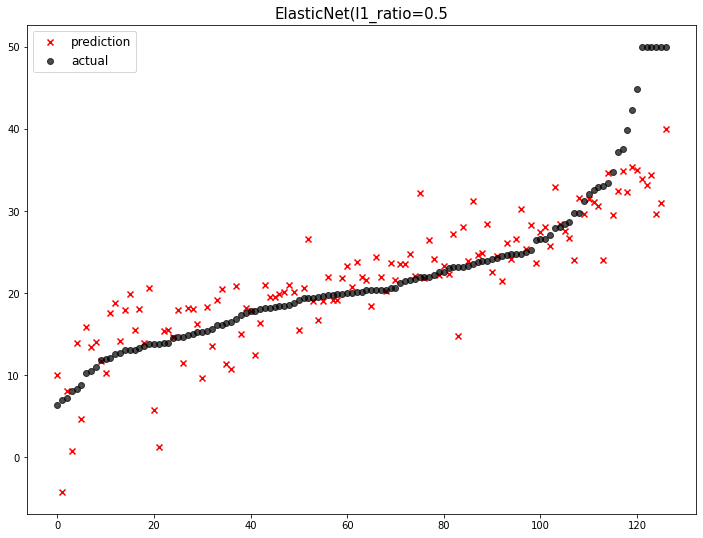

                      model        mse
0          lasso(alpha=100)  77.687770
1           lasso(alpha=10)  46.775705
2            lasso(alpha=1)  29.633294
3   ElasticNet(l1_ratio=0.2  28.804810
4          lasso(alpha=0.1)  28.716565
5   ElasticNet(l1_ratio=0.5  28.603417
6          Ridge(alpha=100)  28.234192
7           Ridge(alpha=10)  28.100121
8            Ridge(alpha=1)  27.553631
9         lasso(alpha=0.01)  27.267379
10         Ridge(alpha=0.1)  27.170937
11       lasso(alpha=0.001)  27.135847
12        Ridge(alpha=0.01)  27.130057
13      lasso(alpha=0.0001)  27.126776
14       Ridge(alpha=0.001)  27.126238
15      Ridge(alpha=0.0001)  27.125859
16         LinearRegression  27.125817


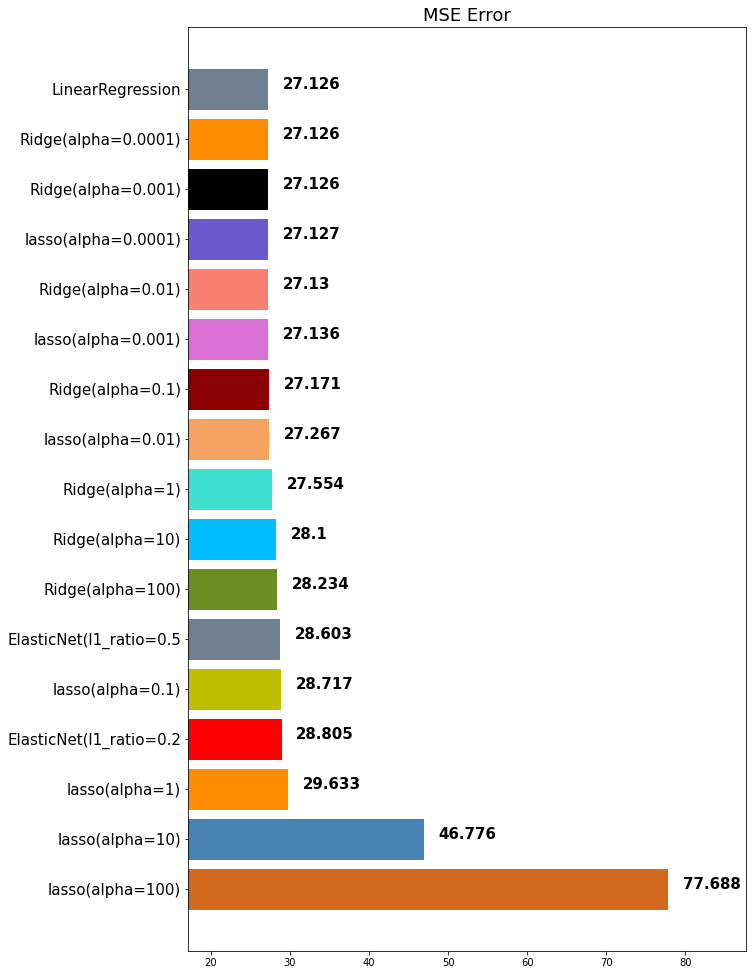

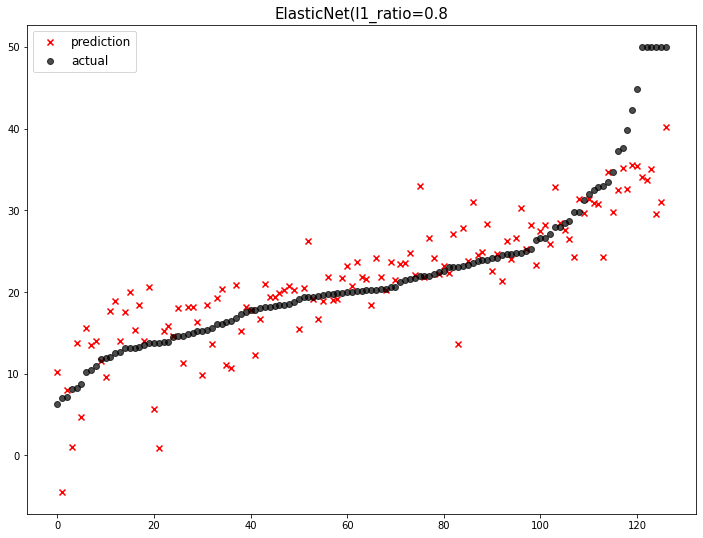

                      model        mse
0          lasso(alpha=100)  77.687770
1           lasso(alpha=10)  46.775705
2            lasso(alpha=1)  29.633294
3   ElasticNet(l1_ratio=0.2  28.804810
4          lasso(alpha=0.1)  28.716565
5   ElasticNet(l1_ratio=0.5  28.603417
6   ElasticNet(l1_ratio=0.8  28.317431
7          Ridge(alpha=100)  28.234192
8           Ridge(alpha=10)  28.100121
9            Ridge(alpha=1)  27.553631
10        lasso(alpha=0.01)  27.267379
11         Ridge(alpha=0.1)  27.170937
12       lasso(alpha=0.001)  27.135847
13        Ridge(alpha=0.01)  27.130057
14      lasso(alpha=0.0001)  27.126776
15       Ridge(alpha=0.001)  27.126238
16      Ridge(alpha=0.0001)  27.125859
17         LinearRegression  27.125817


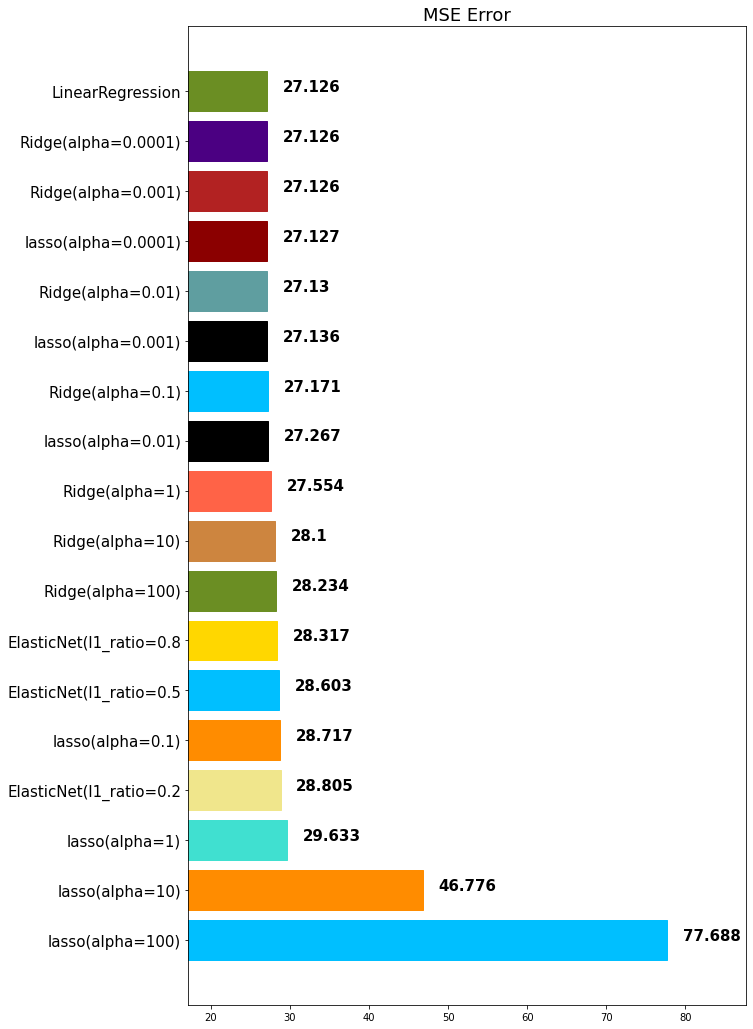

In [30]:
from sklearn.linear_model import ElasticNet

ratios = [0.2, 0.5, 0.8]

for ratio in ratios:
    elasticnet = ElasticNet(alpha=0.5, l1_ratio=ratio)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    mse_eval("ElasticNet(l1_ratio={}".format(ratio), pred, y_test)

In [31]:
elasticnet_20 = ElasticNet(alpha=5, l1_ratio=0.2)
elasticnet_20.fit(x_train, y_train)
elasticnet_pred_20 = elasticnet_20.predict(x_test)

elasticnet_80 = ElasticNet(alpha=5, l1_ratio=0.8)
elasticnet_80.fit(x_train, y_train)
elasticnet_pred_80 = elasticnet_80.predict(x_test)

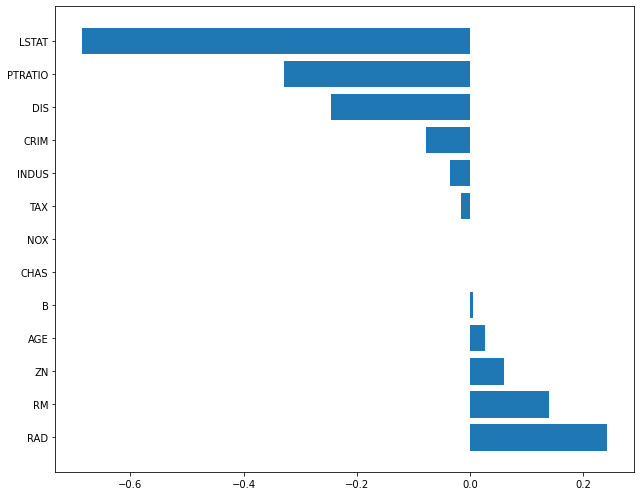

In [32]:
plot_coef(x_train.columns, elasticnet_20.coef_)

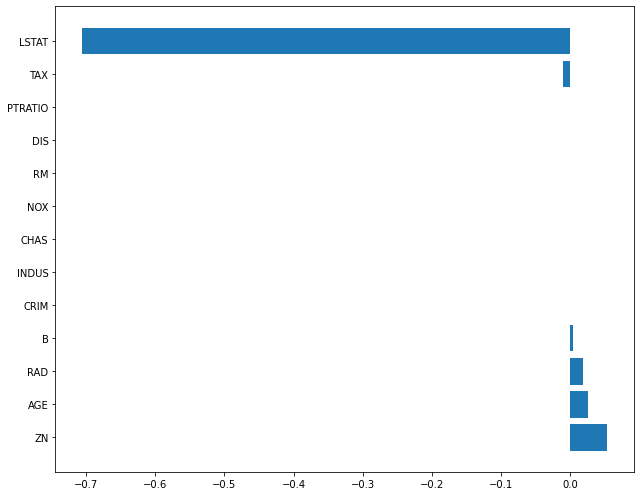

In [33]:
plot_coef(x_train.columns, elasticnet_80.coef_)

---
# Scikit-learn : 회귀 - Scaler 적용
---

- StandardScaler
- MinMaxScaler
- RobustScaler

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.513350,11.343008,10.979129,0.073879,0.553223,6.307301,67.931398,3.801088,9.522427,405.625330,18.374670,355.649235,12.408232
std,8.441904,22.697628,6.831510,0.261919,0.113819,0.675845,27.858696,2.067087,8.627899,167.404595,2.188871,94.067319,6.870067
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,6.000000,1.129600,1.000000,187.000000,12.600000,0.320000,1.920000
25%,0.079960,0.000000,5.130000,0.000000,0.449000,5.897000,43.550000,2.115300,4.000000,277.000000,17.000000,376.140000,7.155000
50%,0.253560,0.000000,9.690000,0.000000,0.532000,6.212000,75.000000,3.272100,5.000000,329.000000,18.900000,391.500000,10.880000
75%,3.551845,20.000000,18.100000,0.000000,0.624000,6.635000,93.450000,5.213250,24.000000,666.000000,20.200000,396.220000,16.430000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,21.200000,396.900000,34.410000


---
### StandardScaler
평균(mean)을 0, 표준편차(std)를 1로 만들어주는 스케일러

---

In [35]:
std_scaler = StandardScaler()
std_scaled = std_scaler.fit_transform(x_train)
round(pd.DataFrame(std_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.42,-0.50,-1.54,-0.28,-1.44,-4.07,-2.23,-1.29,-0.99,-1.31,-2.64,-3.78,-1.53
25%,-0.41,-0.50,-0.86,-0.28,-0.92,-0.61,-0.88,-0.82,-0.64,-0.77,-0.63,0.22,-0.77
50%,-0.39,-0.50,-0.19,-0.28,-0.19,-0.14,0.25,-0.26,-0.52,-0.46,0.24,0.38,-0.22
75%,0.00,0.38,1.04,-0.28,0.62,0.49,0.92,0.68,1.68,1.56,0.84,0.43,0.59
max,10.14,3.91,2.46,3.54,2.80,3.58,1.15,4.03,1.68,1.83,1.29,0.44,3.21


---
### MinMaxdScaler
min값과 max값을 0~1 사이로 정규화

---

In [36]:
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train)
round(pd.DataFrame(minmax_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.04,0.11,0.39,0.07,0.34,0.53,0.66,0.24,0.37,0.42,0.67,0.90,0.32
std,0.09,0.23,0.25,0.26,0.24,0.13,0.30,0.19,0.38,0.32,0.25,0.24,0.21
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.17,0.00,0.12,0.45,0.40,0.09,0.13,0.17,0.51,0.95,0.16
50%,0.00,0.00,0.34,0.00,0.30,0.51,0.73,0.19,0.17,0.27,0.73,0.99,0.28
75%,0.04,0.20,0.65,0.00,0.49,0.60,0.93,0.37,1.00,0.91,0.88,1.00,0.45
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


---
### RobustScaler
중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 변환  
**outlier 값 처리 유용**

---

In [37]:
robust_scaler = RobustScaler()
robust_scaled =robust_scaler.fit_transform(x_train)
round(pd.DataFrame(robust_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.94,0.57,0.10,0.07,0.12,0.13,-0.14,0.17,0.23,0.20,-0.16,-1.79,0.16
std,2.43,1.13,0.53,0.26,0.65,0.92,0.56,0.67,0.43,0.43,0.68,4.68,0.74
min,-0.07,0.00,-0.71,0.00,-0.82,-3.59,-1.38,-0.69,-0.20,-0.37,-1.97,-19.48,-0.97
25%,-0.05,0.00,-0.35,0.00,-0.47,-0.43,-0.63,-0.37,-0.05,-0.13,-0.59,-0.76,-0.40
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.95,1.00,0.65,0.00,0.53,0.57,0.37,0.63,0.95,0.87,0.41,0.24,0.60
max,25.55,5.00,1.39,1.00,1.94,3.41,0.50,2.86,0.95,0.98,0.72,0.27,2.54


---
# Scikit-learn : 회귀 - 파이프라인 (Pipeline)
---

In [38]:
from sklearn.pipeline import make_pipeline

elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [39]:
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)

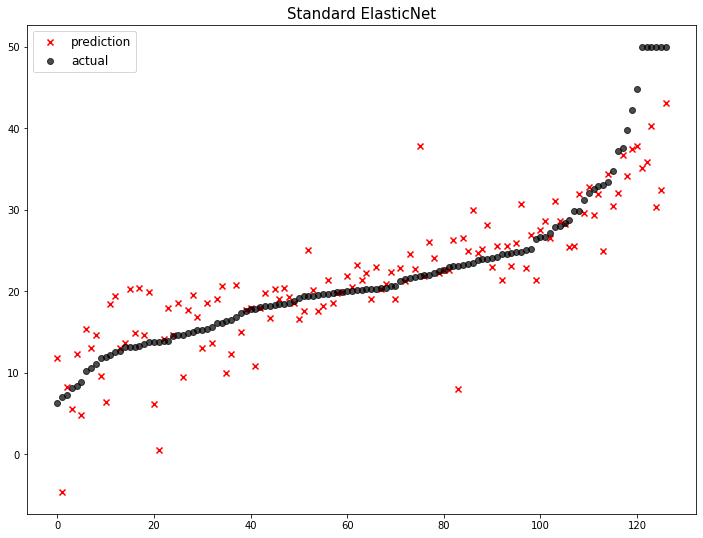

                      model        mse
0          lasso(alpha=100)  77.687770
1           lasso(alpha=10)  46.775705
2            lasso(alpha=1)  29.633294
3   ElasticNet(l1_ratio=0.2  28.804810
4          lasso(alpha=0.1)  28.716565
5   ElasticNet(l1_ratio=0.5  28.603417
6   ElasticNet(l1_ratio=0.8  28.317431
7          Ridge(alpha=100)  28.234192
8           Ridge(alpha=10)  28.100121
9            Ridge(alpha=1)  27.553631
10        lasso(alpha=0.01)  27.267379
11         Ridge(alpha=0.1)  27.170937
12       lasso(alpha=0.001)  27.135847
13        Ridge(alpha=0.01)  27.130057
14      lasso(alpha=0.0001)  27.126776
15       Ridge(alpha=0.001)  27.126238
16      Ridge(alpha=0.0001)  27.125859
17         LinearRegression  27.125817
18      Standard ElasticNet  26.318991


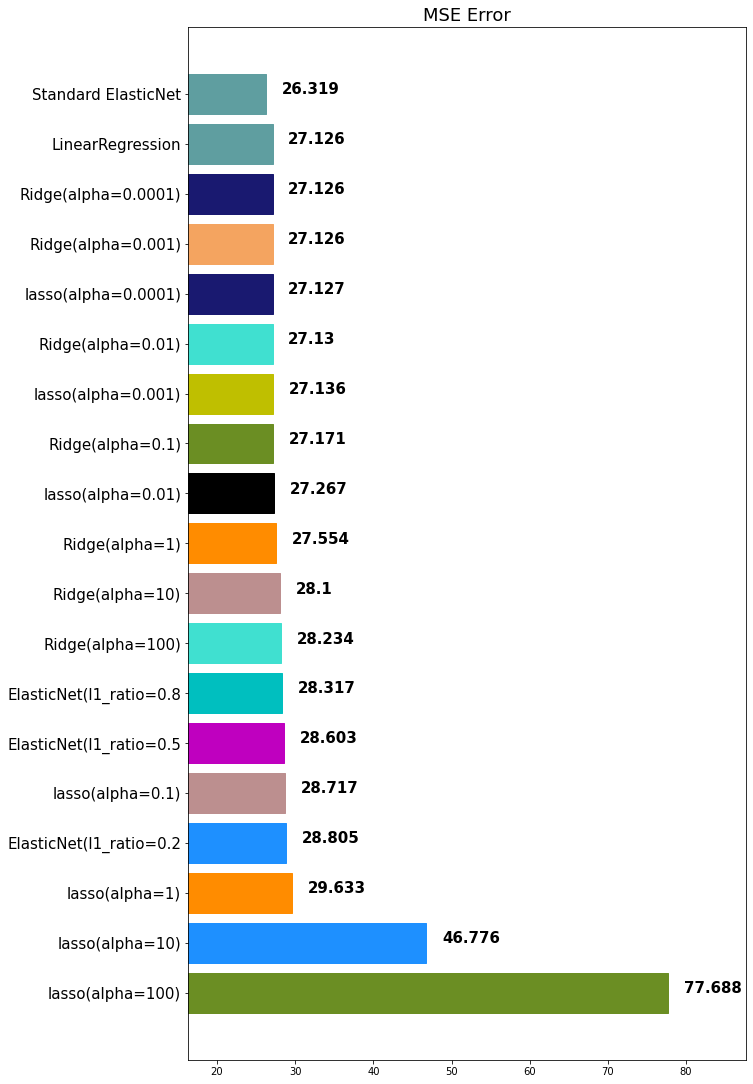

In [40]:
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

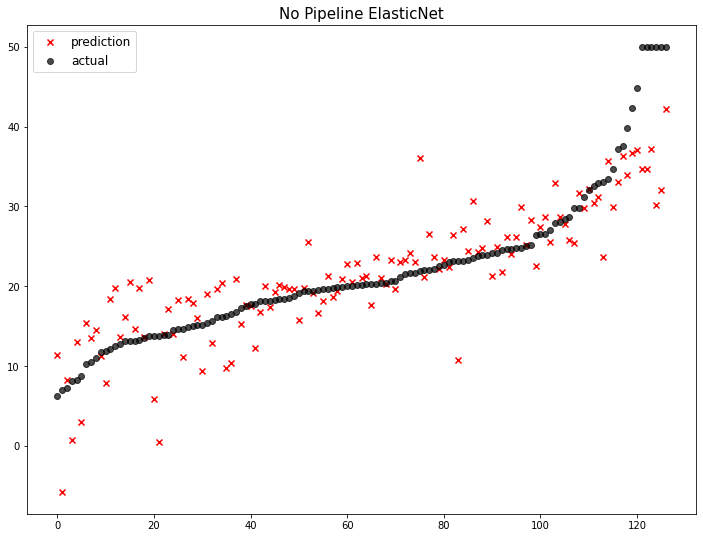

                      model        mse
0          lasso(alpha=100)  77.687770
1           lasso(alpha=10)  46.775705
2            lasso(alpha=1)  29.633294
3   ElasticNet(l1_ratio=0.2  28.804810
4          lasso(alpha=0.1)  28.716565
5   ElasticNet(l1_ratio=0.5  28.603417
6   ElasticNet(l1_ratio=0.8  28.317431
7          Ridge(alpha=100)  28.234192
8           Ridge(alpha=10)  28.100121
9    No Pipeline ElasticNet  28.064208
10           Ridge(alpha=1)  27.553631
11        lasso(alpha=0.01)  27.267379
12         Ridge(alpha=0.1)  27.170937
13       lasso(alpha=0.001)  27.135847
14        Ridge(alpha=0.01)  27.130057
15      lasso(alpha=0.0001)  27.126776
16       Ridge(alpha=0.001)  27.126238
17      Ridge(alpha=0.0001)  27.125859
18         LinearRegression  27.125817
19      Standard ElasticNet  26.318991


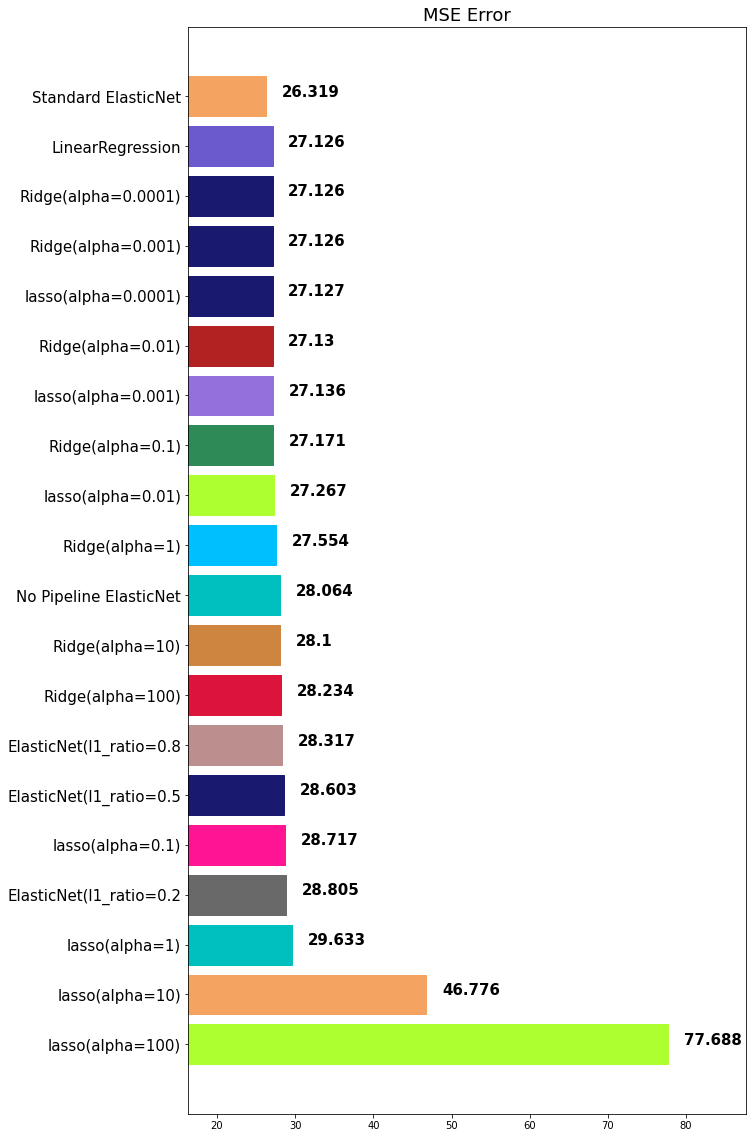

In [41]:
elastic_no_pipeline = ElasticNet(alpha=0.1, l1_ratio=0.2)
no_pipeline_pred = elastic_no_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('No Pipeline ElasticNet', no_pipeline_pred, y_test)

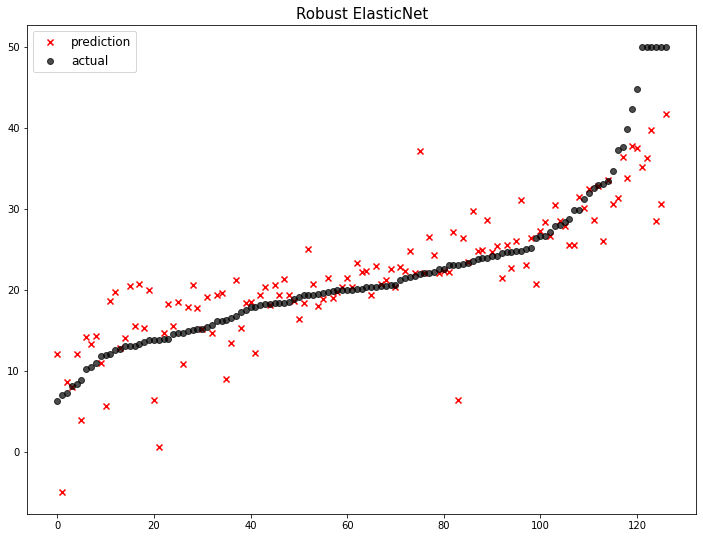

                      model        mse
0          lasso(alpha=100)  77.687770
1           lasso(alpha=10)  46.775705
2            lasso(alpha=1)  29.633294
3   ElasticNet(l1_ratio=0.2  28.804810
4          lasso(alpha=0.1)  28.716565
5   ElasticNet(l1_ratio=0.5  28.603417
6   ElasticNet(l1_ratio=0.8  28.317431
7          Ridge(alpha=100)  28.234192
8           Ridge(alpha=10)  28.100121
9    No Pipeline ElasticNet  28.064208
10        Robust ElasticNet  28.026906
11           Ridge(alpha=1)  27.553631
12        lasso(alpha=0.01)  27.267379
13         Ridge(alpha=0.1)  27.170937
14       lasso(alpha=0.001)  27.135847
15        Ridge(alpha=0.01)  27.130057
16      lasso(alpha=0.0001)  27.126776
17       Ridge(alpha=0.001)  27.126238
18      Ridge(alpha=0.0001)  27.125859
19         LinearRegression  27.125817
20      Standard ElasticNet  26.318991


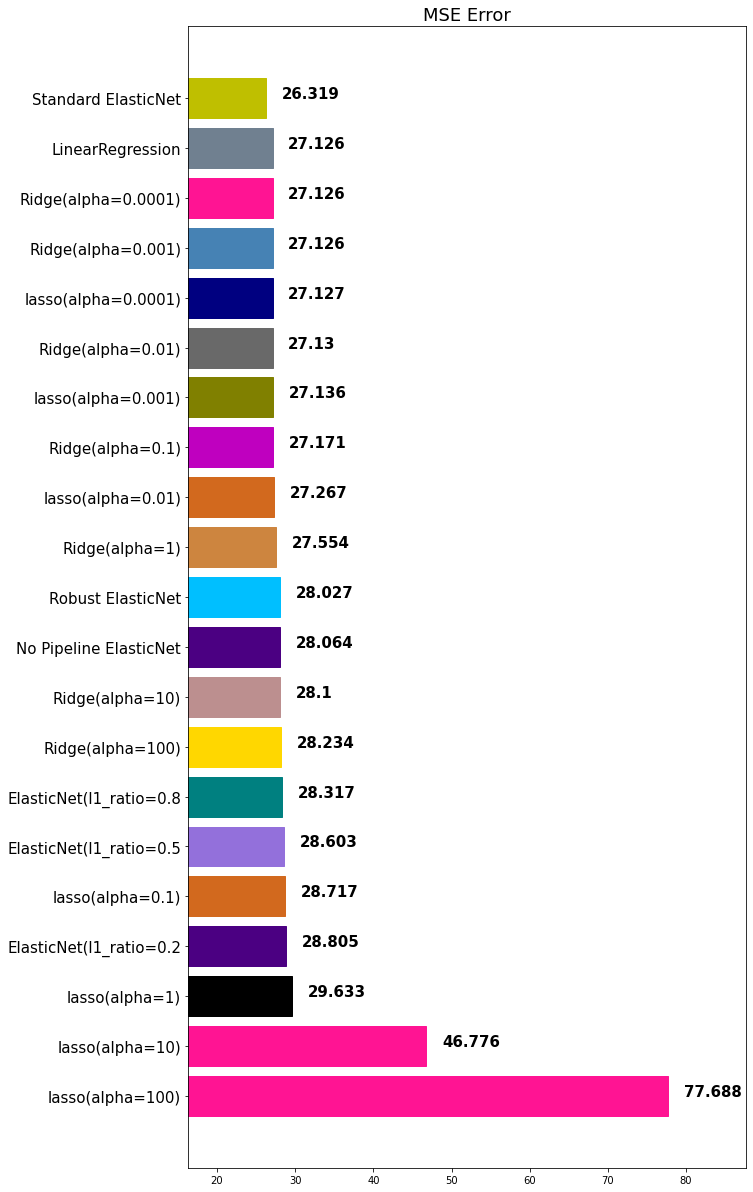

In [42]:
elasticnet_pipeline = make_pipeline(
    RobustScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('Robust ElasticNet', elasticnet_pred, y_test)

---
# Scikit-learn : 회귀 - 다항식 모델 (Polynomial Features

- 다항식의 계수간 상호작용을 통해 새로운 feature를 생성함
---

In [43]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x_train)[0]
poly_features

array([     0.09266   ,     34.        ,      6.09      ,      0.        ,
            0.433     ,      6.495     ,     18.4       ,      5.4917    ,
            7.        ,    329.        ,     16.1       ,    383.61      ,
            8.67      ,      0.00858588,      3.15044   ,      0.5642994 ,
            0.        ,      0.04012178,      0.6018267 ,      1.704944  ,
            0.50886092,      0.64862   ,     30.48514   ,      1.491826  ,
           35.5453026 ,      0.8033622 ,   1156.        ,    207.06      ,
            0.        ,     14.722     ,    220.83      ,    625.6       ,
          186.7178    ,    238.        ,  11186.        ,    547.4       ,
        13042.74      ,    294.78      ,     37.0881    ,      0.        ,
            2.63697   ,     39.55455   ,    112.056     ,     33.444453  ,
           42.63      ,   2003.61      ,     98.049     ,   2336.1849    ,
           52.8003    ,      0.        ,      0.        ,      0.        ,
            0.        ,  

In [44]:
x_train.loc[0]

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
Name: 0, dtype: float64

In [45]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.359769423720536, tolerance: 3.1241151503957787
  positive)


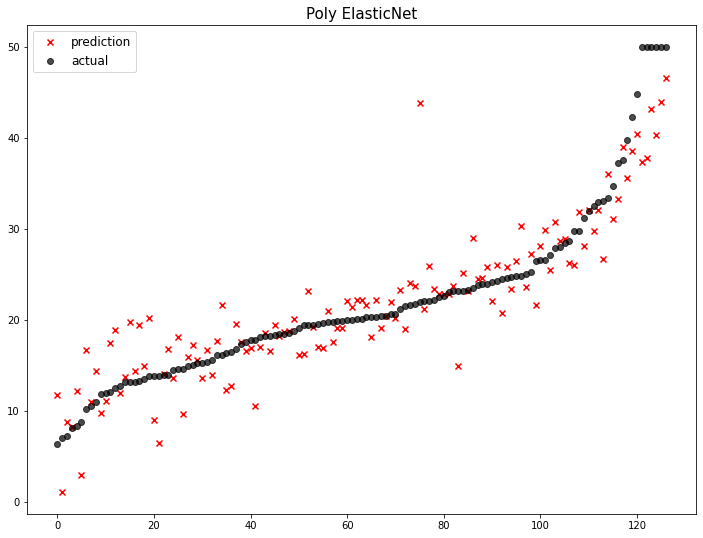

                      model        mse
0          lasso(alpha=100)  77.687770
1           lasso(alpha=10)  46.775705
2            lasso(alpha=1)  29.633294
3   ElasticNet(l1_ratio=0.2  28.804810
4          lasso(alpha=0.1)  28.716565
5   ElasticNet(l1_ratio=0.5  28.603417
6   ElasticNet(l1_ratio=0.8  28.317431
7          Ridge(alpha=100)  28.234192
8           Ridge(alpha=10)  28.100121
9    No Pipeline ElasticNet  28.064208
10        Robust ElasticNet  28.026906
11           Ridge(alpha=1)  27.553631
12        lasso(alpha=0.01)  27.267379
13         Ridge(alpha=0.1)  27.170937
14       lasso(alpha=0.001)  27.135847
15        Ridge(alpha=0.01)  27.130057
16      lasso(alpha=0.0001)  27.126776
17       Ridge(alpha=0.001)  27.126238
18      Ridge(alpha=0.0001)  27.125859
19         LinearRegression  27.125817
20      Standard ElasticNet  26.318991
21          Poly ElasticNet  16.756097


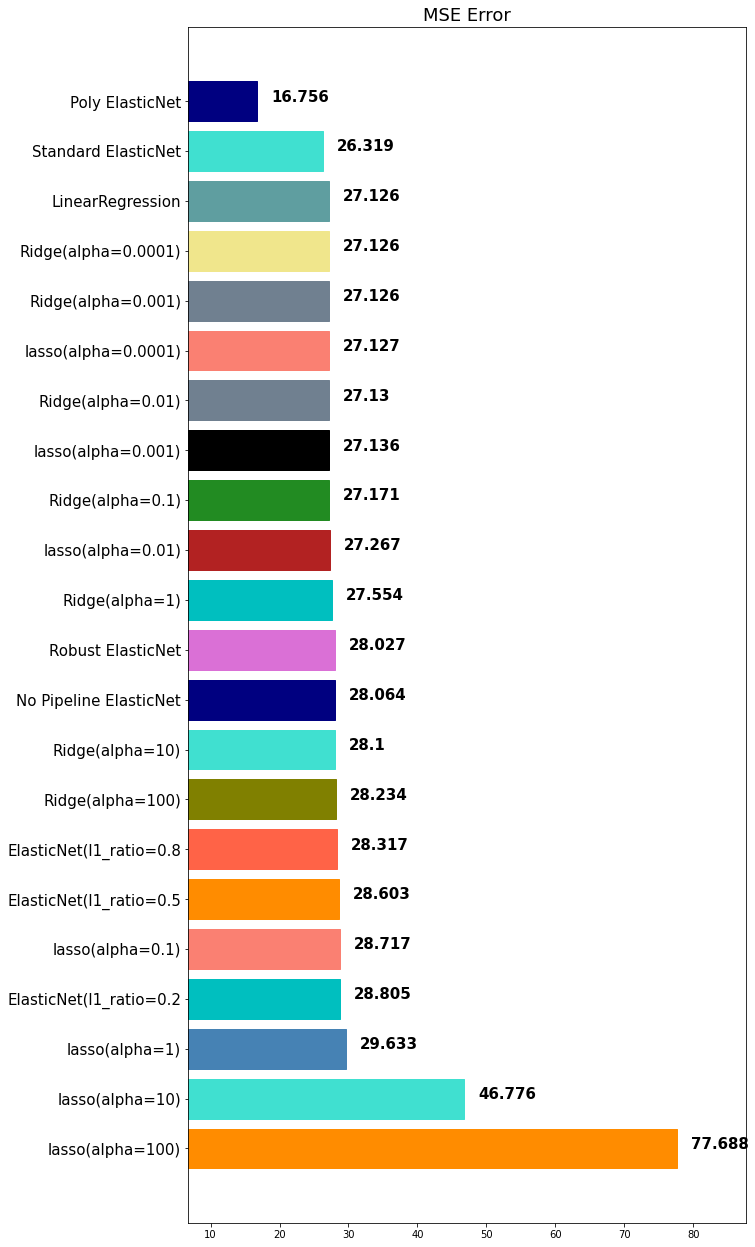

In [47]:
mse_eval('Poly ElasticNet', poly_pred, y_test)